#### Import Libraries:

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#### Combine all data files:

In [7]:
files = [file for file in os.listdir('./Sales_Data')]
files

['Sales_April_2019.csv',
 'Sales_August_2019.csv',
 'Sales_December_2019.csv',
 'Sales_February_2019.csv',
 'Sales_January_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv',
 'Sales_March_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_September_2019.csv']

In [8]:
all_data = pd.DataFrame()
for file in files:
    df = pd.read_csv('./Sales_Data/'+file)
    all_data = pd.concat([all_data,df])
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [9]:
all_data.to_csv('combine_data.csv',index=False)

In [10]:
df = pd.read_csv('combine_data.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Data Understanding:

In [12]:
df.shape

(186850, 6)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [13]:
df.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [14]:
df.duplicated().sum()

1162

In [21]:
df = df.dropna(how='all')
df.shape

(186305, 6)

##### Question#1 What was the best month for sales? How Much was earned in that month?

In [22]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


##### Droping Invalid values

In [29]:
df = df[~df['Order Date'].str.contains('Or')]
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


##### Creating Month Column

In [31]:
df['Month'] = df['Order Date'].str.split('/').str[0].astype('int32')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


##### Adding total sales column

In [32]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int32') 
df['Price Each'] = df['Price Each'].astype('float32')

In [34]:
df['total_sales'] = round(df['Quantity Ordered'] * df['Price Each'],2)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### So what was the best months for sales:

In [39]:
best_month_sales = df.groupby('Month')[['Quantity Ordered','Price Each','total_sales']].sum().sort_values(by='total_sales',ascending=False)
best_month_sales

,Quantity Ordered,Price Each,total_sales
Month,,,
12,28114,4588415.500,4613443.34
10,22703,3715554.750,3736726.88
4,20558,3367671.000,3390670.24
11,19798,3180600.750,3199603.20
5,18667,3135125.000,3152606.75
3,17005,2791207.750,2807100.38
7,16072,2632539.500,2647775.76
6,15253,2562025.500,2577802.26
8,13448,2230345.500,2244467.88


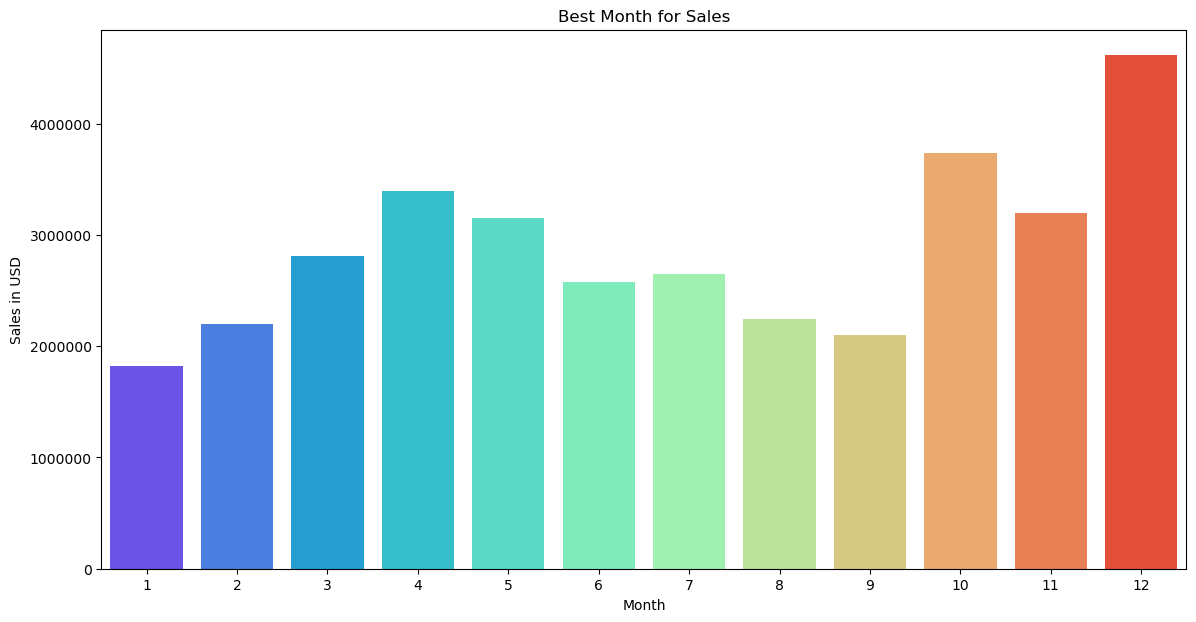

In [43]:
plt.figure(figsize=(14,7))
sns.barplot(x=best_month_sales.index,y=best_month_sales['total_sales'],palette='rainbow')
plt.title('Best Month for Sales')
plt.xlabel('Month')
plt.ylabel('Sales in USD')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

#### Question#2 Which city has the highest number of sales?

In [44]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### Adding City Column

In [47]:
df['City'] = df['Purchase Address'].str.split(',').str[1].str.strip()
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,City
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [48]:
# So, Which city has the highest number of sales?
top_city_sales = df.groupby('City')[['Quantity Ordered','Price Each','total_sales']].sum().sort_values(by='total_sales',ascending=False)
top_city_sales

,Quantity Ordered,Price Each,total_sales
City,,,
San Francisco,50239,8211461.500,8262203.91
Los Angeles,33289,5421435.000,5452570.80
New York City,27932,4635371.000,4664317.43
Boston,22528,3637409.750,3661642.01
Atlanta,16602,2779908.250,2795498.58
Dallas,16730,2752627.750,2767975.40
Seattle,16553,2733296.000,2747755.48
Portland,14053,2307747.500,2320490.61
Austin,11153,1809873.625,1819581.75


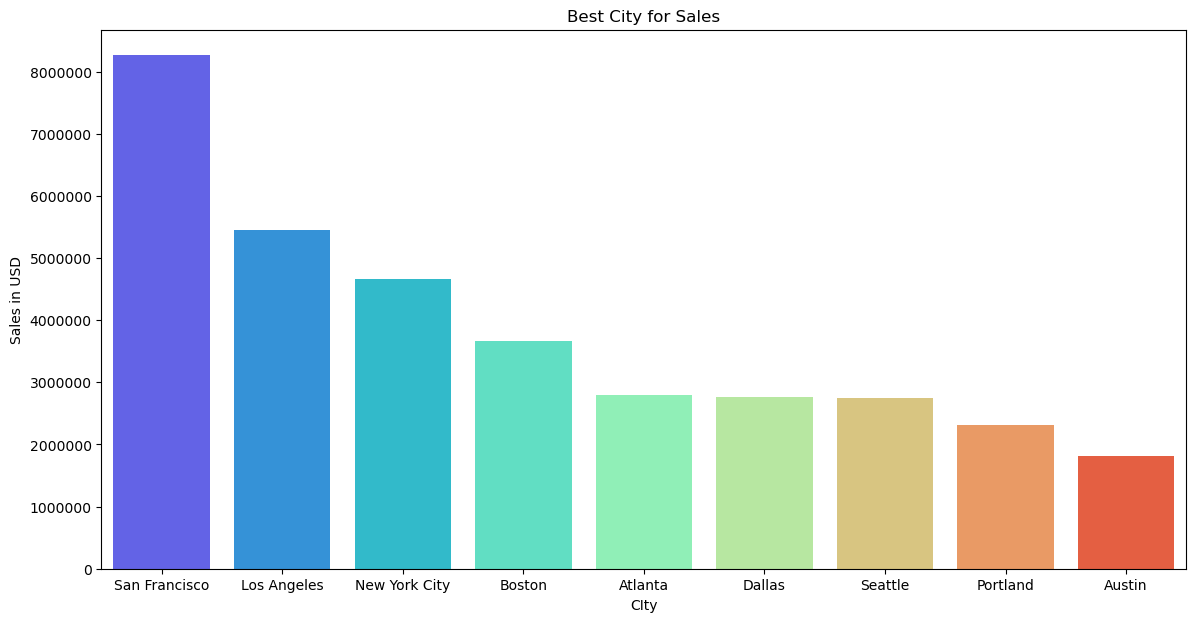

In [59]:
plt.figure(figsize=(14,7))
sns.barplot(x=top_city_sales.index,y=top_city_sales['total_sales'],palette='rainbow')
plt.title('Best City for Sales')
plt.xlabel('CIty')
plt.ylabel('Sales in USD')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

#### Question#3 Which state has best Sales?

##### Addinig States Column

In [57]:
df['State'] = df['Purchase Address'].apply(lambda x: x.split(',')[-1].strip()[0:2])
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,City,State
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [58]:
top_state_sales = df.groupby('State')[['Quantity Ordered','Price Each','total_sales']].sum().sort_values(by='total_sales',ascending=False)
top_state_sales

,Quantity Ordered,Price Each,total_sales
State,,,
CA,83528,13632897.00,13714774.71
NY,27932,4635371.00,4664317.43
TX,27883,4562501.50,4587557.15
MA,22528,3637409.75,3661642.01
GA,16602,2779908.25,2795498.58
WA,16553,2733296.00,2747755.48
OR,11303,1860558.25,1870732.34
ME,2750,447189.25,449758.27


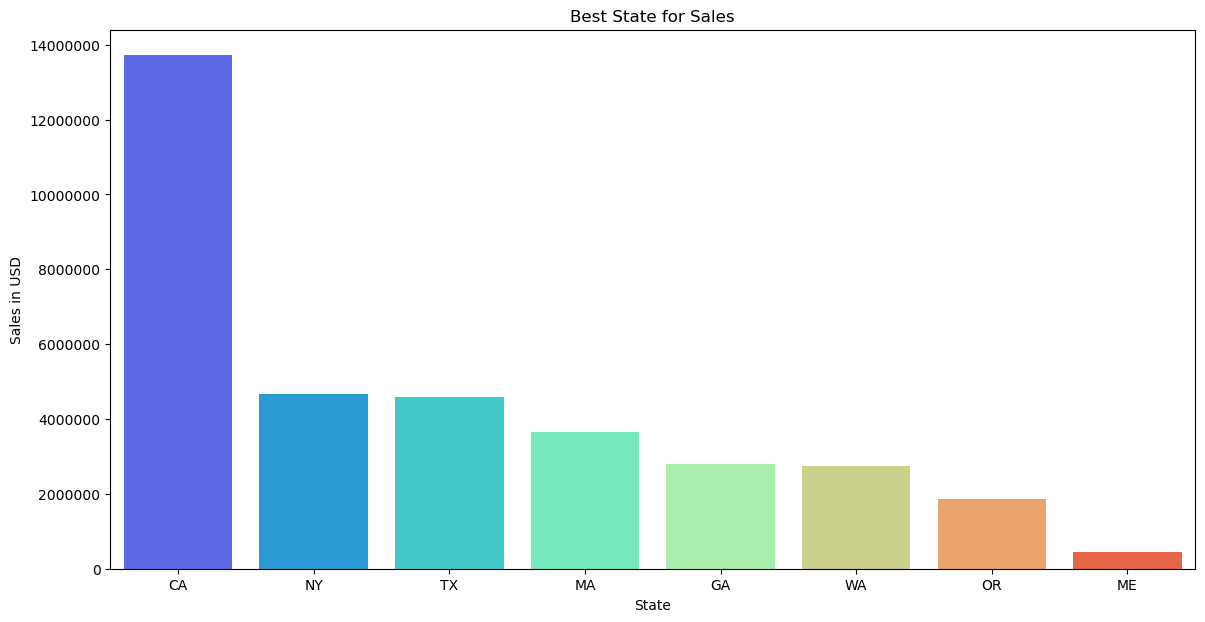

In [60]:
plt.figure(figsize=(14,7))
sns.barplot(x=top_state_sales.index,y=top_state_sales['total_sales'],palette='rainbow')
plt.title('Best State for Sales')
plt.xlabel('State')
plt.ylabel('Sales in USD')
plt.ticklabel_format(style='plain',axis='y')
plt.show()

#### Question#3 What time is best for Sales?

In [61]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,City,State
0,176558,USB-C Charging Cable,2,11.950000,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.989998,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.000000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.990000,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.990000,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


In [62]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

/tmp/ipykernel_47477/128272601.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order Date'] = pd.to_datetime(df['Order Date'])


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,City,State
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA


##### Addining Hour and Minutes columns:

In [65]:
df['Hour'] = df['Order Date'].dt.hour
df['Minute'] = df['Order Date'].dt.minute
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,City,State,Hour,Minute
0,176558,USB-C Charging Cable,2,11.950000,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,TX,8,46
2,176559,Bose SoundSport Headphones,1,99.989998,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,MA,22,30
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
5,176561,Wired Headphones,1,11.990000,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,9,27


In [79]:
top_hrs_sales = df.groupby('Hour')[['total_sales']].count()
top_hrs_sales

,total_sales
Hour,
0,3910
1,2350
2,1243
3,831
4,854
5,1321
6,2482
7,4011
8,6256


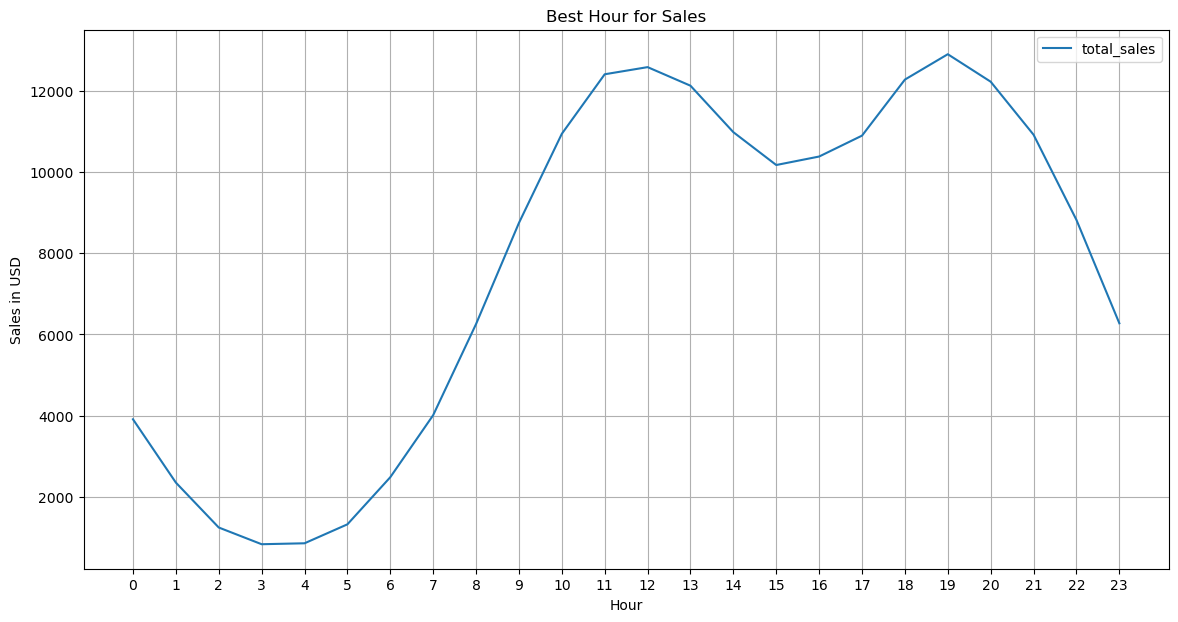

In [81]:
plt.figure(figsize=(14,7))
sns.lineplot(top_hrs_sales)
plt.title('Best Hour for Sales')
plt.xlabel('Hour')
plt.ylabel('Sales in USD')
plt.xticks(np.arange(0,24,1))
plt.ticklabel_format(style='plain',axis='y')
plt.grid()
plt.show()

#### Question#4 What Products are sold most offten together/in pairs?

In [82]:
order_df = df[df['Order ID'].duplicated(keep=False)]
order_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,City,State,Hour,Minute
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19,42
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19,42
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,31


In [83]:
order_df['Items Ordered'] = order_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
order_df.head()

/tmp/ipykernel_47477/1635870743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  order_df['Items Ordered'] = order_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,total_sales,City,State,Hour,Minute,Items Ordered
3,176560,Google Phone,1,600.000000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.990000,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,CA,14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.000000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles,CA,19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.950000,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles,CA,19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.989998,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston,MA,11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [84]:
# Drop duplicates
order_df = order_df[['Order ID','Items Ordered']].drop_duplicates()
order_df.head()

,Order ID,Items Ordered
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [85]:
from itertools import combinations
from collections import Counter

In [90]:
count = Counter()
for items in order_df['Items Ordered']:
    item_list = items.split(',')
    count.update(Counter(combinations(item_list,2)))
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

#### Question#5 What product sold the most?

In [94]:
top_products = df.groupby('Product')[['Quantity Ordered']].sum()
top_products

,Quantity Ordered
Product,
20in Monitor,4129
27in 4K Gaming Monitor,6244
27in FHD Monitor,7550
34in Ultrawide Monitor,6199
AA Batteries (4-pack),27635
AAA Batteries (4-pack),31017
Apple Airpods Headphones,15661
Bose SoundSport Headphones,13457
Flatscreen TV,4819


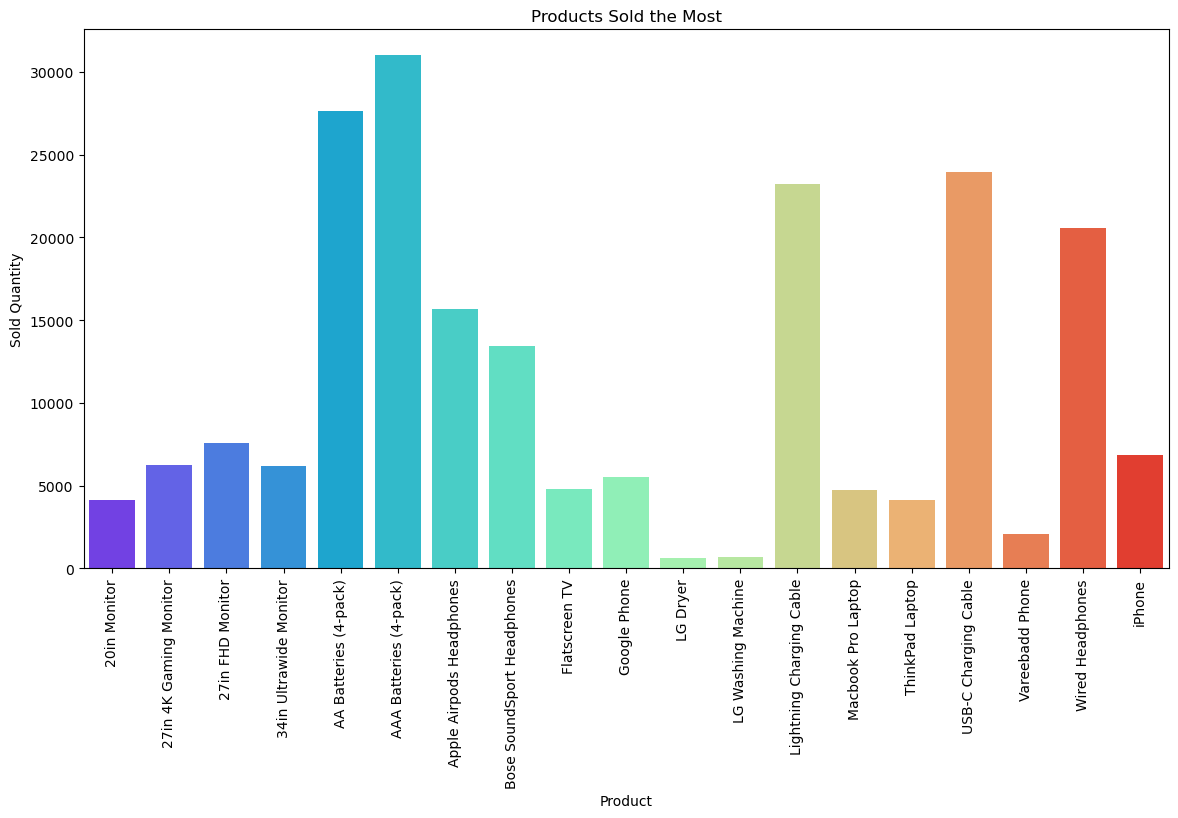

In [96]:
plt.figure(figsize=(14,7))
sns.barplot(x=top_products.index,y=top_products['Quantity Ordered'],palette='rainbow')
plt.title('Products Sold the Most')
plt.xlabel('Product')
plt.ylabel('Sold Quantity')
plt.xticks(rotation=90)
plt.show()